# $\zeta$-Space of Lorenz Synchronization
------------------------------------------------
This notebook is an example of the $\zeta$-space application over two Lorenz systems with unidirectional coupling.

In [1]:
!pip install MFDFA
!pip install git+https://github.com/rsautter/Zeta-Space/

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/rsautter/Zeta-Space/ to /tmp/pip-req-build-3jc873cm
  Running command git clone -q https://github.com/rsautter/Zeta-Space/ /tmp/pip-req-build-3jc873cm
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for zetaSpace: filename=zetaSpace-0.1-py3-none-any.whl size=9314 sha256=0836f99fc6cb5ce148b1aa9fd180ed620fb6376799cd26e309bfbb3d21879a7e
  Stored in directory: /tmp/pip-ephem-wheel-cache-dp5v7ouo/wheels/a4/d7/18/7c110a72b8b1a7ee9bbf36d1bd76aa54dd16b165ffe2599af8
Successfully built zetaSpace


In [2]:
import zeta
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tqdm

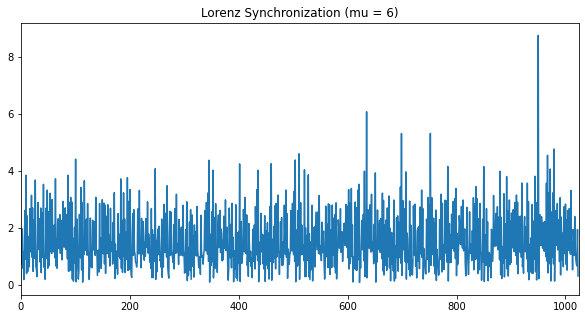

In [19]:
mu1 = 6
t, r1= zeta.lorenzSynch(mup=mu1, n=2**10+100)
r1 = r1[100:]

plt.figure(figsize=(10,5))
plt.plot(r1/np.std(r1))
plt.title(r"Lorenz Synchronization (mu = "+str(mu1)+")")
plt.xlim(0,len(r1))
plt.show()

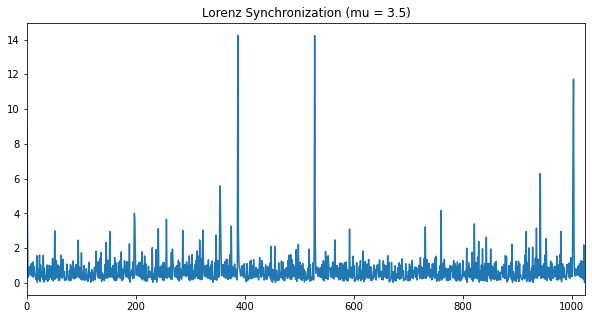

In [33]:
mu2 = 3.5
t, r2= zeta.lorenzSynch(mup=mu2, n=2**10+100)
r2 = r2[100:]

plt.figure(figsize=(10,5))
plt.plot(r2/np.std(r2))
plt.title(r"Lorenz Synchronization (mu = "+str(mu2)+")")
plt.xlim(0,len(r2))
plt.show()

# 2. Power Spectrum and Singularity Spectrum
-----------------------------------------------------------------

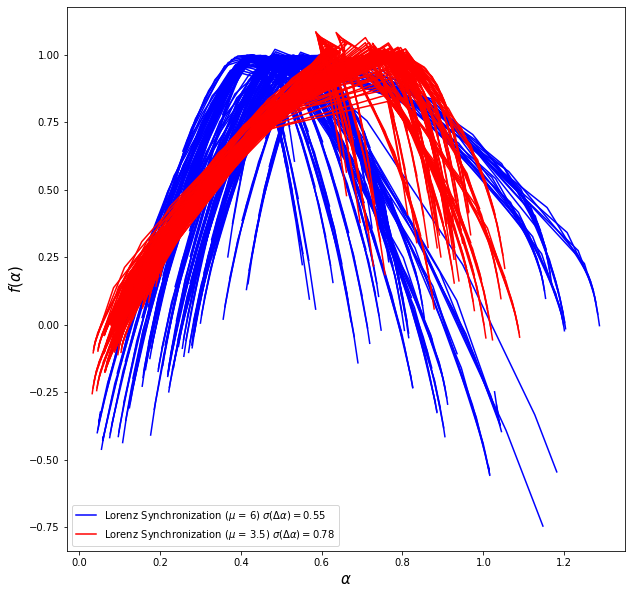

In [24]:
bas, bfas, w  = zeta.autoMFDFA(r1)
xbas, xbfas, xw  = zeta.autoMFDFA(r2)

plt.figure(figsize=(10,10))
for i in range(len(bas)):
  if i==0:
    plt.plot(bas[i],bfas[i],color='b',label=r"Lorenz Synchronization ($\mu$ = "+str(mu1)+r") $\sigma(\Delta \alpha )=$"+str(np.round(w,2)))
  else:
    plt.plot(bas[i],bfas[i],color='b')
for i in range(len(xbas)):
  if i == 0:
    plt.plot(xbas[i],xbfas[i],color='r',label=r"Lorenz Synchronization ($\mu$ = "+str(mu2)+r") $\sigma(\Delta \alpha )=$"+str(np.round(xw,2)))  
  else:
    plt.plot(xbas[i],xbfas[i],color='r')
plt.xlabel(r"$\alpha$",fontsize=15)
plt.ylabel(r"$f(\alpha)$",fontsize=15)
plt.legend()
plt.show()

In [25]:
print(r"$\mu$="+str(mu1)+":")
print(zeta.zetaSpace(r1))
print(r"$\mu$="+str(mu2)+":")
print(zeta.zetaSpace(r2))

$\mu$=6:
{'GQQ': 0.07317163950503924, 'LDA': 0.4819781581175686}
$\mu$=3.5:
{'GQQ': 0.518011955131304, 'LDA': 0.8279124804138381}


In [42]:
nSeries = 600
zL = []

for i in tqdm.tqdm(range(nSeries)):
  # random value between [2,6]
  mu = 2 + 4*np.random.rand()
  t, r= zeta.lorenzSynch(mup=mu, n=2**10+100)
  r = r[100:]
  zL.append(zeta.zetaSpace(r,nsamples=10))

zL = pd.DataFrame(zL)

100%|██████████| 600/600 [15:59<00:00,  1.60s/it]


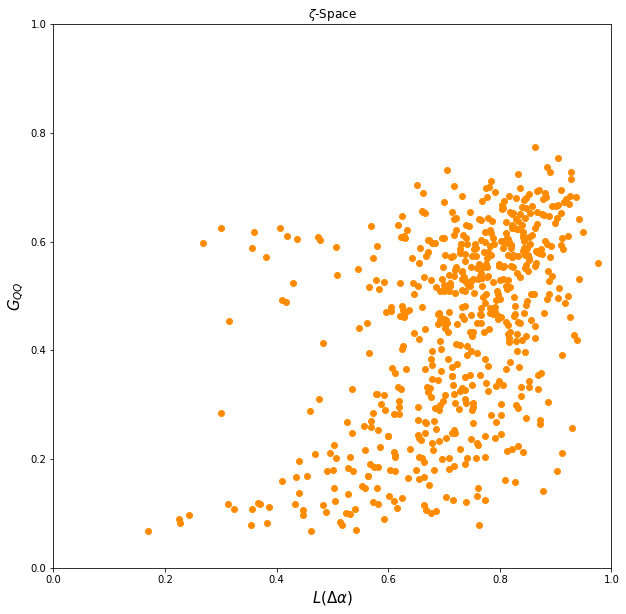

In [43]:
plt.figure(figsize=(10,10))
plt.title(r"$\zeta$-Space")
plt.scatter(zL['LDA'], zL['GQQ'],color='darkorange')
plt.xlabel(r"$L (\Delta \alpha)$",fontsize=15)
plt.ylabel("$G_{QQ}$",fontsize=15)
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

In [45]:
zL.to_csv("zLorenz.csv")